In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML
from collections import Counter
from nltk.corpus import stopwords
import nltk

In [66]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\acoifman\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [2]:
data = pd.read_csv('../Datasets/abcnews-date-text.csv')
data.head(3)

publish_date                                      headline_text
0      20030219  aba decides against community broadcasting lic...
1      20030219     act fire witnesses must be aware of defamation
2      20030219     a g calls for infrastructure protection summit

In [3]:
str(data['publish_date'][0])[4:6]

'02'

In [4]:
data['year'] = data.apply(lambda row: str(row.publish_date)[0:4], axis=1)

In [5]:
data['month'] = data.apply(lambda row: str(row.publish_date)[4:6],axis=1)

In [6]:
data['year+month'] = data.apply(lambda row: str(row.publish_date)[0:6],axis=1)

In [7]:
data

publish_date                                      headline_text  \
0            20030219  aba decides against community broadcasting lic...   
1            20030219     act fire witnesses must be aware of defamation   
2            20030219     a g calls for infrastructure protection summit   
3            20030219           air nz staff in aust strike for pay rise   
4            20030219      air nz strike to affect australian travellers   
...               ...                                                ...   
1103658      20171231  the ashes smiths warners near miss liven up bo...   
1103659      20171231            timelapse: brisbanes new year fireworks   
1103660      20171231           what 2017 meant to the kids of australia   
1103661      20171231   what the papodopoulos meeting may mean for ausus   
1103662      20171231  who is george papadopoulos the former trump ca...   

         year month year+month  
0        2003    02     200302  
1        2003    02     200302  
2        2003    02     200302  
3        2003    02     200302  
4        2003    02     200302  
...       ...   ...        ...  
1103658  2017    12     201712  
1103659  2017    12     201712  
1103660  2017    12     201712  
1103661  2017    12     201712  
1103662  2017    12     201712  

[1103663 rows x 5 columns]

In [41]:
new_data = pd.DataFrame()

In [31]:
data.iloc[0]['year']+data.iloc[0]['month']

'200302'

data['headline_text'].str.cat(sep=" ")

In [8]:
test = data[data['year+month']=='200303']['headline_text'].str.cat(sep=' ')

In [9]:
split_it = test.split()

In [61]:
Counter = Counter(split_it)

In [62]:
most_occur = Counter.most_common(4)

In [63]:
most_occur

[('to', 535), ('for', 274), ('in', 272), ('on', 145)]

In [9]:
stop_words = stopwords.words('english')

In [12]:
test_stop = [word for word in split_it if word not in stop_words]

In [86]:
test2 = test.split()

In [87]:
test2_st = [word for word in test2 if word not in stop_words]

In [13]:
Counter = Counter(test_stop)

In [14]:
most_occur = Counter.most_common(10)

In [20]:
result = pd.DataFrame(most_occur,columns=['word','value'])

In [21]:
result

word  value
0       us    344
1      war    330
2     iraq    324
3   police    202
4     govt    167
5      man    152
6      new    150
7     says    140
8    iraqi    128
9  council    106

<BarContainer object of 10 artists>

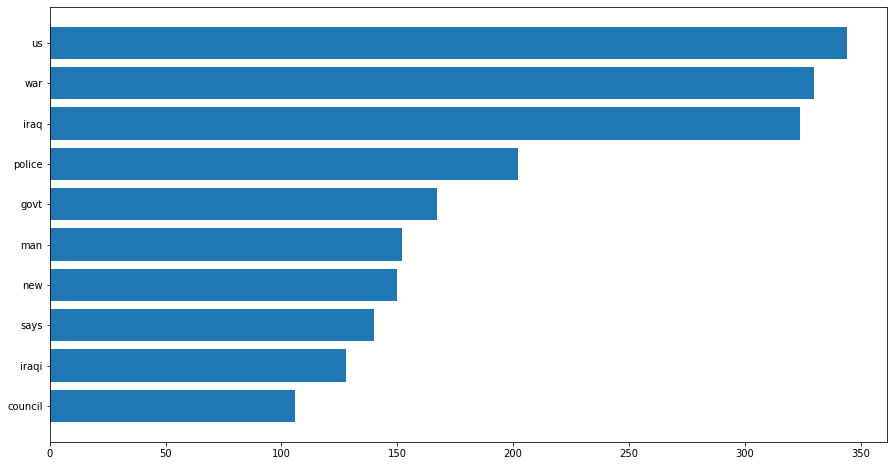

In [26]:
fig, ax = plt.subplots(figsize=(15,8))
result = result[::-1]
ax.barh(result['word'],result['value'])

This one we will have to swap values from top to bottom

In [27]:
current_year = 2003

Text(1, 0.4, '2003')

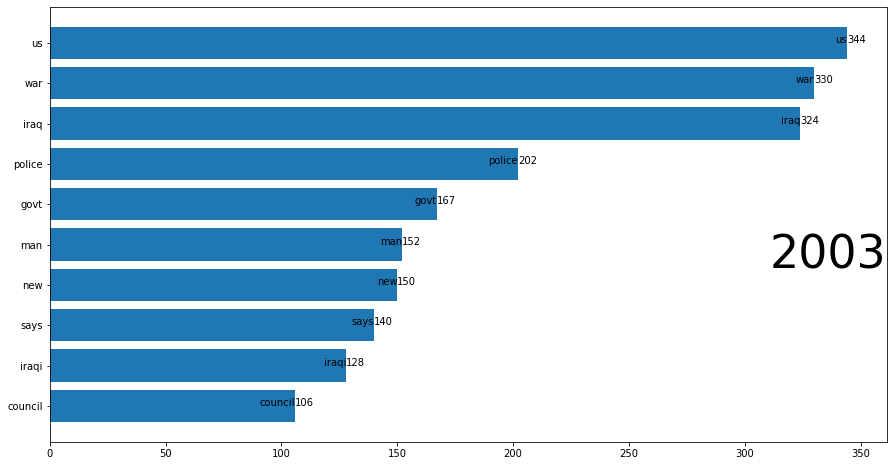

In [28]:
fig, ax = plt.subplots(figsize=(15,8))
# result = result[::-1] #flip values from top to bottom
# pass colors values to `color=`
ax.barh(result['word'],result['value'])
# iterate over the values to plot labels and values (Tokyo, Asia, 38194.2)
for i, (value,name) in enumerate(zip(result['value'],result['word'])):
    ax.text(value,i,name,ha='right') # Tokyo: name
#     ax.text(value,i-.25,group_lk[name], ha='right') # Asia: group name
    ax.text(value,i,value,ha='left') # 38194.2: value
# Add year right middle portion of canvas
ax.text(1,0.4,current_year,transform=ax.transAxes,size=46,ha='right')

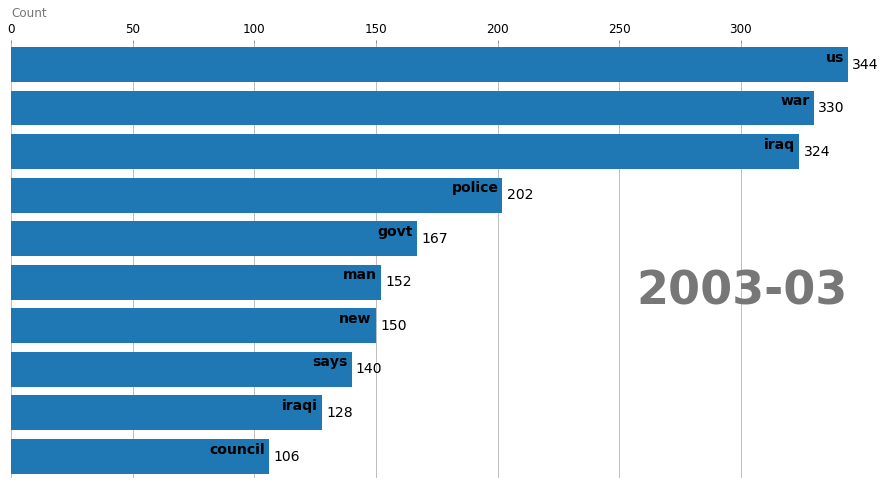

In [20]:
fig, ax = plt.subplots(figsize=(15,8))

def draw_barchart(yearmonth):
    year = yearmonth[0:4]
    month = yearmonth[4:6]
#     data_trans = data[data['year'].eq(year)].sort_values(by='value',ascending=True).tail(10)
    data_trans = data[data['year+month'].eq(year+month)]['headline_text'].str.cat(sep=' ')
    split_data = data_trans.split()
    data_stop = [word for word in split_data if word not in stop_words]
    counter = Counter(data_stop)
    most_occur = counter.most_common(10)
    result = pd.DataFrame(most_occur,columns=['word','value'])
    result = result[::-1]
    ax.clear()
    ax.barh(result['word'],result['value'])
    dx = result['value'].max() / 200
    for i, (value,name) in enumerate(zip(result['value'],result['word'])):
        ax.text(value-dx,i,name,size=14,weight=600,ha='right',va='bottom')
#         ax.text(value-dx,i-.25,group_lk[name],size=10,color='#444444',ha='right',va='baseline')
        ax.text(value+dx,i,f'{value:,.0f}',size=14,ha='left',va='center')
    ax.text(1,0.4,year+'-'+month,transform=ax.transAxes,color='#777777',size=46,ha='right',weight=800)
    ax.text(0,1.06,'Count', transform=ax.transAxes,size=12,color="#777777")
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x',color='#777777',labelsize=12)
    ax.set_yticks([])
    ax.margins(0,0.01)
    ax.grid(which='major',axis='x',linestyle='-')
    ax.set_axisbelow(True)
#     ax.text(0,1.12,'The most populous cities in the world from 1500 to 2018',transform=ax.transAxes,size=24,weight=600,ha='left')
#     ax.text(1,0,'by @pratapvardhan; credit @jburnmurdoch',transform=ax.transAxes,ha='right',color="#777777",bbox=dict(facecolor='white',alpha=0.8,edgecolor='white'))
    plt.box(False)

draw_barchart('200303')

In [22]:
year_month = list(data['year+month'].unique())

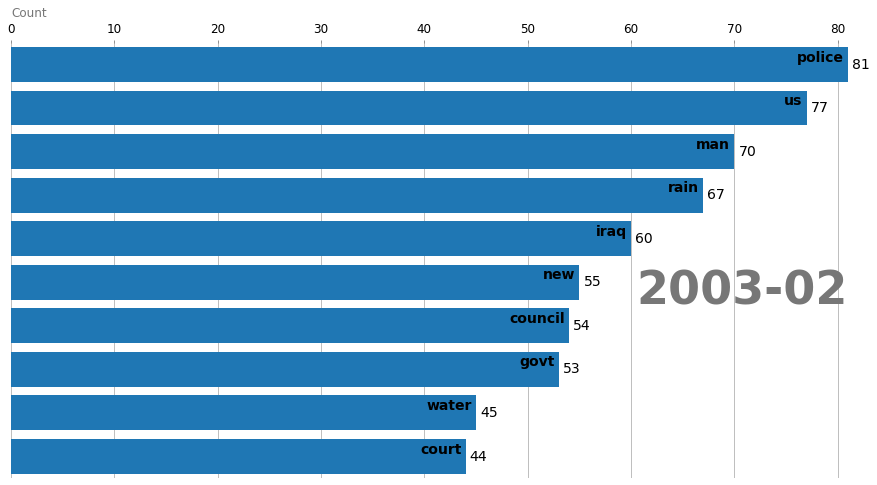

In [24]:
fig, ax = plt.subplots(figsize=(15,8))
animator = animation.FuncAnimation(fig,draw_barchart,frames=year_month,interval=1000)
HTML(animator.to_jshtml())